<center>
<a href="http://www.insa-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo-insa.jpg" style="float:left; max-width: 120px; display: inline" alt="INSA"/></a> 

<a href="http://wikistat.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/wikistat.jpg" style="max-width: 250px; display: inline"  alt="Wikistat"/></a>

<a href="http://www.math.univ-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo_imt.jpg" style="float:right; max-width: 200px; display: inline" alt="IMT"/> </a>
</center>

# [Scénarios d'Exploration Statistique](https://github.com/wikistat/Exploration)

# [ACP](http://wikistat.fr/pdf/st-m-explo-acp.pdf) et [Analyse Factorielle Discriminante (AFD)]() en  <a href="https://www.python.org/"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Python_logo_and_wordmark.svg/390px-Python_logo_and_wordmark.svg.png" style="max-width: 120px; display: inline" alt="Python"/></a> avec <a href="http://scikit-learn.org/stable/#"><img src="http://scikit-learn.org/stable/_static/scikit-learn-logo-small.png" style="max-width: 100px; display: inline" alt="Scikit-Learn"/></a>
##  Données socio-économiques départementales (en travaux)
### Résumé
Analyse de données socio-économiques par [ACP](http://wikistat.fr/pdf/st-m-explo-acp.pdf) puis par [Analyse Factorielle Discriminante](http://wikistat.fr/pdf/st-m-explo-afd.pdf) avec Python.

## 1 Introduction
### 1.1 Objectif
Ce scénario se focalise sur l'exploration de données socio-économiques observées sur les différents départements regroupés en régions administratives. La question posée est: les régions définies géographiquement sont elles relativement homogènes sur ces aspects socio-économiques. Ce peut être une analyse éclairante que la volonté de supprimer les départements et regrouper des régions. On répond à cette question de façon indirecte et exploratoire, en cherchant à savoir si les variables socio-économiques permettent de discriminer les régions.

Il y a différentes approches du problème de la discrimination selon les hypothèses admises et la méthodologie mise en \oe uvre. Nous nous limitons ici à l'approche descriptive ou factorielle. L'approche décisionnelle est traité en [saison 3](https://github.com/wikistat/Apprentissage). L'objectif est de représenter graphiquement la qualité de discrimination des classes définies par la variables qualitatives à partir des combinaisons linéaires des variables quantitatives explicatives. 

### 1.2 Les données
Les données proviennent du Groupe d'Étude et de Réflexion Inter-régional (GERI). Elles décrivent, quatre grands thèmes: la démographie, l'emploi, la fiscalité directe locale, la criminalité, de chacun des départements français métropolitains et la Corse. Les indicateurs ont été observés pendant l'année 1990, ils sont, pour la plupart, des taux calculés relativement à la population totale du département concerné. Voici leur liste~:
- index du numéro du département,
- icod: identificateur code du département,
- ireg: identificateur code de la région avant 2016
- urbr: indicateur de concentration de la population mesurant le caractère urbain ou rural d''un département,
- txcr: taux de croissance de la population sur la période intercensitaire 1982-1990,
- jeun: part des 0-19 ans dans la population totale, 
- age: part des plus de 65 ans dans la population totale,
- fe90: taux de fécondité (pour 1000) égal au nombre de naissances rapportés au nombre de femmes fécondes (15 à 49 ans) en moyenne triennale, 
- etra: part des étrangers dans la population totale, 
- chom: taux de chômage, 
- crim: taux de criminalité~: nombre de délits par habitant,
- fisc: produit, en francs constants 1990 et par habitant des quatre taxes directes locales (professionnelle, habitation, foncier bâti, foncier non bâti).

Parts de chaque profession et catégorie socioprofessionnelle (PCS) dans la population active occupée du département~:
- agri: agriculteurs,
- arti: artisans, 
- cadr: cadres supérieurs, 
- empl: employés, 
- ouvr: ouvriers, 
- prof: professions intermédiaires

In [2]:
# Importaiton des principals librairies et 
# Affichage des graphiques dans le notebook
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 2 Lecture des données
Les donnés sont dans deux fichiers. Celui original est `depart.dat` qui est complété dans un fichier `depart.csv` en ajoutant un autre code de région administrative obtenue par regroupement des précédentes.

In [5]:
depart=pd.read_table("Data/depart.dat",sep='\s+',index_col=0)
depart.head()

,icod,ireg,urbr,txcr,jeun,age,fe90,etra,chom,crim,fisc,agri,arti,cadr,empl,ouvr,prof
1,Ai,RhA,12.19,0.095,0.339,0.285,0.133,0.070,0.045,0.084,0.088,0.240,0.347,0.195,2772.3,38.7,52.3
2,As,Pic,0.89,0.035,0.358,0.289,0.143,0.133,0.049,0.070,0.071,0.240,0.400,0.171,2854.4,52.2,56.9
3,Al,Auv,-2.63,0.031,0.464,0.227,0.204,0.135,0.086,0.095,0.070,0.262,0.311,0.176,3159.6,39.0,42.7
4,AP,PAC,10.00,0.046,0.190,0.235,0.190,0.123,0.065,0.127,0.090,0.261,0.256,0.200,4033.1,57.7,52.3
5,AH,PAC,7.82,0.037,0.294,0.250,0.173,0.089,0.072,0.117,0.078,0.302,0.230,0.201,3364.9,49.2,53.5


In [12]:
codeDep=depart["icod"]
codeReg=depart["ireg"]
data=depart.drop(["icod","ireg"],axis=1)
data.head()

,urbr,txcr,jeun,age,fe90,etra,chom,crim,fisc,agri,arti,cadr,empl,ouvr,prof
1,12.19,0.095,0.339,0.285,0.133,0.070,0.045,0.084,0.088,0.240,0.347,0.195,2772.3,38.7,52.3
2,0.89,0.035,0.358,0.289,0.143,0.133,0.049,0.070,0.071,0.240,0.400,0.171,2854.4,52.2,56.9
3,-2.63,0.031,0.464,0.227,0.204,0.135,0.086,0.095,0.070,0.262,0.311,0.176,3159.6,39.0,42.7
4,10.00,0.046,0.190,0.235,0.190,0.123,0.065,0.127,0.090,0.261,0.256,0.200,4033.1,57.7,52.3
5,7.82,0.037,0.294,0.250,0.173,0.089,0.072,0.117,0.078,0.302,0.230,0.201,3364.9,49.2,53.5


## 3 Exploration
### 3.1 Statistiques élémentaires

Une étude exploratoire classique serait bienvenue mais on la considère déjà faite par le résumé ci-dessous.

In [13]:
data.mean()

urbr       3.757579
txcr       0.051211
jeun       0.436779
age        0.258842
fe90       0.162632
etra       0.110821
chom       0.069811
crim       0.085937
fisc       0.092116
agri       0.256021
arti       0.309211
cadr       0.187000
empl    3110.258947
ouvr      52.056842
prof      50.697895
dtype: float64

Répérer un "bug" dans les données. L'origine n'est pas identifiée, sans doute un problème d'unité dans les taux. Il n'est pas corrigé.

**Q** Quel choix dans les paramètres de l'acp permet de le négliger.

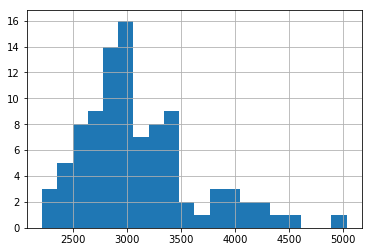

In [14]:
data["empl"].hist(bins=20)
plt.show()

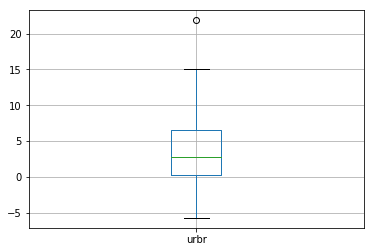

In [19]:
data.boxplot("urbr")
plt.show()

**Q** Identifier le département atypique.

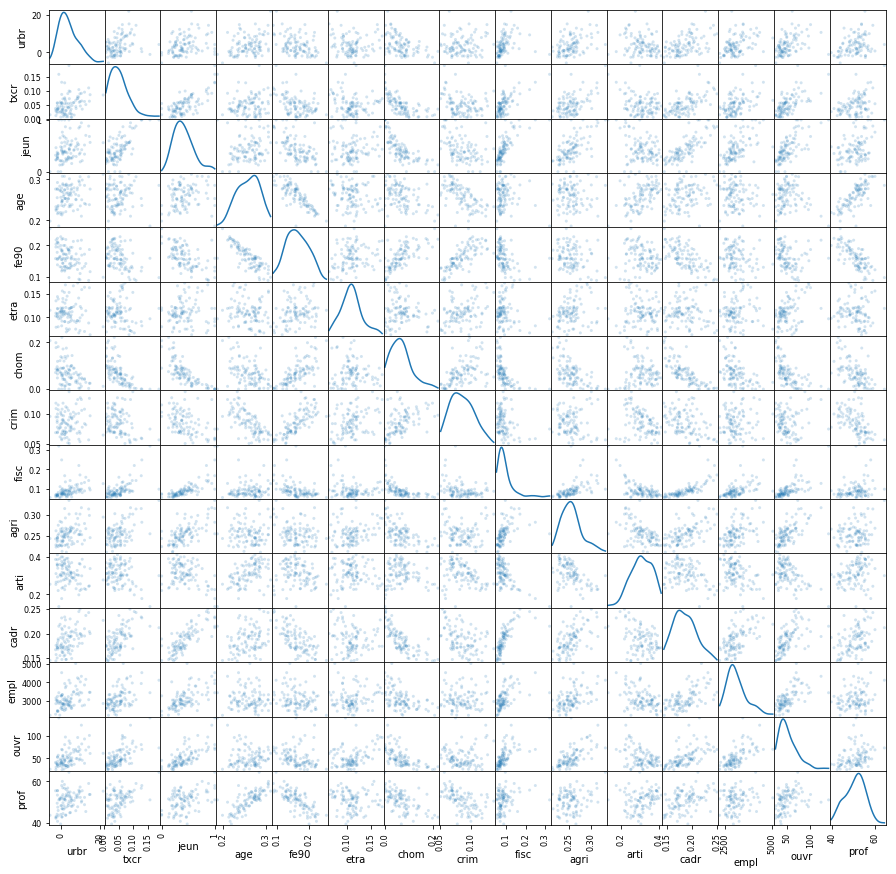

In [20]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha=0.2, figsize=(15, 15), diagonal='kde')
plt.show()

**Q** Que dire de la structure de corrélation ? Choisissons de négliger ces problèmes.

L'étape descriptive élémentaire ne conduit pas à des re-transformations des variables.

**Q**  Celles-ci sont, pour la plupart, déjà des taux. Pourquoi ? 

### 3.1 [Analyse en composantes principales](http://wikistat.fr/pdf/st-m-explo-acp.pdf)

#### Composantes principales

In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [23]:
dataS=scale(data)
pca = PCA()
cpDepart = pca.fit_transform(dataS)

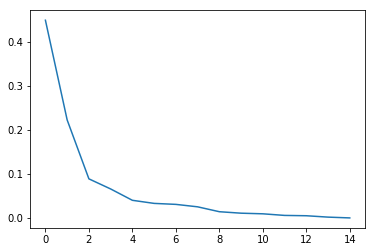

In [24]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

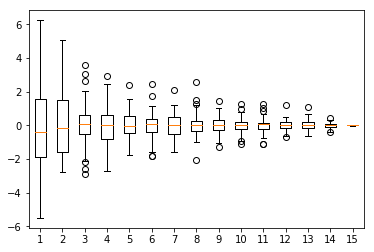

In [25]:
## distribution des composantes principales
plt.boxplot(cpDepart)
plt.show()

**Q** Combien de composantes retenir? Pourquoi?

#### Représentation des variables

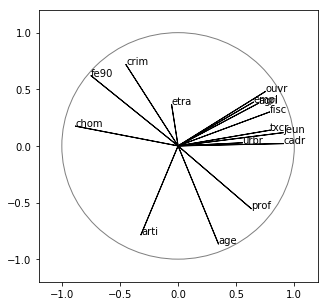

In [26]:
## coordonnées et représentation des variables
coord1=pca.components_[0]*np.sqrt(pca.explained_variance_[0])
coord2=pca.components_[1]*np.sqrt(pca.explained_variance_[1])
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1,coord2, data.columns):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='black')
plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
c=plt.Circle((0,0), radius=1, color='gray', fill=False)
ax.add_patch(c)
plt.show()

**Q** Interprétation des axes 1, 2?

#### Représentation des individus
Avec les numéros de département

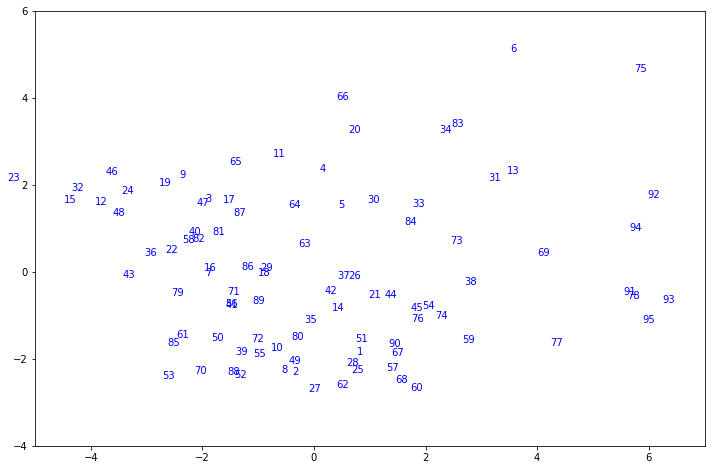

In [36]:
plt.figure(figsize=(12,8))
for i, j, nom in zip(cpDepart[:,0], cpDepart[:,1], data.index):
#    color = int(i/4)
    plt.text(i, j, nom ,color="blue")
plt.axis((-5,7,-4,6))  
plt.show()

Avec leur code.

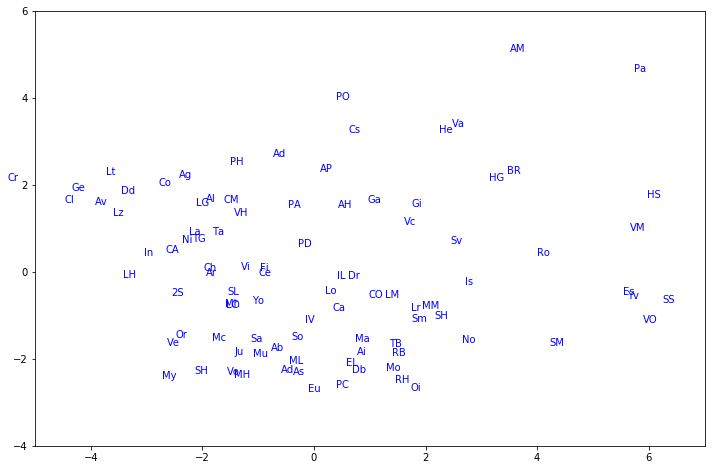

In [37]:
plt.figure(figsize=(12,8))
for i, j, nom in zip(cpDepart[:,0], cpDepart[:,1], codeDep):
#    color = int(i/4)
    plt.text(i, j, nom ,color="blue")
plt.axis((-5,7,-4,6))  
plt.show()

**Q** Identifier les départements les plus plus à droite, à gauche, en haut en bas.

### 3.3 Analyse factorielle discriminante (AFD)

L'AFD est utilisée pour mettre en évidence les plus grandes disparités inter-régionales et donc de rechercher les variables ou combinaisons de variables expliquant au mieux le découpage régional. Corrélativement, les régions administratives sont-elle homogènes d'un point de vue socio-économique? Les régions administratives d'avant 2016 sont trop nombreuses; des regroupements géographiques sont proposés afin de construire des régions plus étendues et  comprenant des nombres de départements plus semblables. D'autre part, la région Ile-de-France, trop particulière et donc trop facile à discriminer (cf. premier plan de l'ACP), est laissée à part. 

#### Regroupement des régions
Ce traitement peut être réalisé de bien des façons; en voici une.

In [42]:
reg1_to_reg2 = { "NPC":"Nd", "Pic":"Nd", "HNo":"Nd", "ChA":"Nd",
    "Als":"Es", "Lor":"Es", "FrC":"Es",
    "BNo":"Ws", "Bre":"Ws", "PaL":"Ws",
    "Cen":"CN", "Bou":"CN",
    "PoC":"CW", "Lim":"CW",
    "Auv":"CE", "RhA":"CE",
    "Aqu":"SW", "MiP":"SW",
    "LaR":"SE", "PAC":"SE", "Cor":"SE"
}
codeReg2 = codeReg.map(reg1_to_reg2)

1      CE
2      Nd
3      CE
4      SE
5      SE
6      SE
7      CE
8      Nd
9      SW
10     Nd
11     SE
12     SW
13     SE
14     Ws
15     CE
16     CW
17     CW
18     CN
19     CW
20     SE
21     CN
22     Ws
23     CW
24     SW
25     Es
26     CE
27     Nd
28     CN
29     Ws
30     SE
     ... 
66     SE
67     Es
68     Es
69     CE
70     Es
71     CN
72     Ws
73     CE
74     CE
75    NaN
76     Nd
77    NaN
78    NaN
79     CW
80     Nd
81     SW
82     SW
83     SE
84     SE
85     Ws
86     CW
87     CW
88     Es
89     CN
90     Es
91    NaN
92    NaN
93    NaN
94    NaN
95    NaN
Name: ireg, Length: 95, dtype: object